#### Knock Airport Weather

Data link for Knock Airport Weather CSV. https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

Import Libraries

In [35]:
# Python libraries

import pandas as pd
import datetime
import numpy as np
import seaborn as sns
#import regex

Loading Data

In [68]:
# Load data and skip the first 23 rows.
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, low_memory=False)
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


Cleaning Data

In [69]:
# Assign blank cells(" ") to NAN values.
df.replace(r"^\s*$", np.nan, regex=True, inplace=True)

In [70]:
# Check for missing data.
print(df.isna().sum())

date         0
ind          0
rain        49
ind.1        0
temp         0
ind.2        0
wetb         0
dewpt        0
vappr        0
rhum         0
msl         18
ind.3        0
wdsp        50
ind.4        0
wddir       52
ww       55079
w        55080
sun          0
vis      62174
clht        18
clamt       18
dtype: int64


Dropping NULL values.

In [71]:
# Drop null values.
df.dropna(inplace = True)


In [72]:
# Check if data is clean.
print(df.isna().sum())

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64


Changing 'date' column to 'datetime' type.

In [73]:
pd.to_datetime(df['date']).dt.strftime('%Y-%m-%dT%H:%M:%S')
df['date'] = pd.to_datetime(df['date'])
#df['date']

C:\Users\phumi\AppData\Local\Temp\ipykernel_17944\159575036.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['date']).dt.strftime('%Y-%m-%dT%H:%M:%S')
C:\Users\phumi\AppData\Local\Temp\ipykernel_17944\159575036.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [74]:
print(df['date'].dtype)

datetime64[ns]


Setting the index to the datetime.

In [75]:
df.set_index('date', inplace=True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7


#### Plotting

<Axes: xlabel='date', ylabel='temp'>

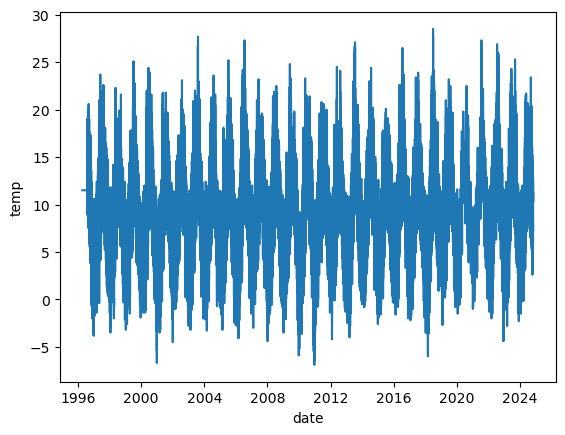

In [76]:
# Temperature over the years
sns.lineplot(data=df, x='date', y='temp')

Mean Temperature

In [45]:
# Calculate the mean temp

dateFrom = "1996-04-10 14:00:00"
dateTo = "2024-11-01 00:00:00"
df.loc[dateFrom:dateTo]['temp'].mean()

9.039584951246873

Calculate Daily Mean Temperature

In [77]:
# Daily mean temperature
daily_av =  df["temp"].resample("D").mean()
daily_av

date
1996-04-10    11.500000
1996-04-11          NaN
1996-04-12          NaN
1996-04-13          NaN
1996-04-14          NaN
                ...    
2024-10-27     9.483333
2024-10-28    11.627273
2024-10-29    10.733333
2024-10-30    11.220000
2024-10-31    10.881818
Freq: D, Name: temp, Length: 10432, dtype: float64

Add a new column ('daily_av').

In [79]:
# Create 'daily_av' column
df['daily_av'] = df["temp"].resample("D").mean()
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,daily_av
date,,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,...,0,0,0,25,81,0.0,35000,32,5,NaN
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,...,0,0,0,25,82,0.0,40000,45,5,NaN
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,...,0,0,0,80,81,0.0,8000,32,7,NaN


Cleaning Data

In [80]:
# checking for any missing data
print(df['daily_av'].isnull())

date
1996-04-10 14:00:00    True
1996-07-31 08:00:00    True
1996-07-31 09:00:00    True
1996-07-31 10:00:00    True
1996-07-31 11:00:00    True
                       ... 
2024-10-31 13:00:00    True
2024-10-31 14:00:00    True
2024-10-31 15:00:00    True
2024-10-31 16:00:00    True
2024-10-31 17:00:00    True
Name: daily_av, Length: 185424, dtype: bool


In [81]:
# Dropping null values.

df.dropna(inplace = True)
df.head(3)


,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,daily_av
date,,,,,,,,,,,,,,,,,,,,,
1996-08-01,0,0.0,0,9.7,0,9.0,8.3,0.0,0,1011.4,...,0,0,0,1,81,0.0,35000,999,3,11.704348
1996-08-02,0,0.0,0,10.3,0,9.6,8.9,11.4,91,1020.7,...,4,2,260,1,82,0.0,35000,30,6,12.504167
1996-08-03,0,0.0,0,12.1,0,11.7,11.3,13.4,95,1028.6,...,5,2,230,2,11,4.9,40000,39,7,14.266667


Daily mean temperature plot

<Axes: xlabel='date', ylabel='daily_av'>

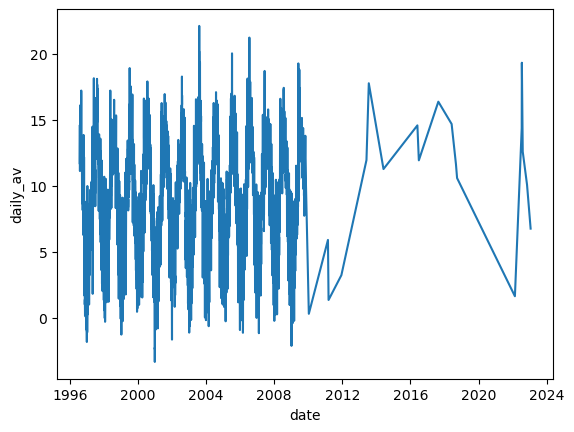

In [82]:
# Plot
sns.lineplot(data=df, x='date', y='daily_av')


Calculate Monthly Mean Temperature

In [88]:
# Monthly mean temperature
monthly_av = df["temp"].resample("ME").mean()

Add a new ('monthly_av') column.

In [87]:

#Create 'monthly_av' column
df['monthly_av'] = df["temp"].resample("ME").mean()
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,ind.4,wddir,ww,w,sun,vis,clht,clamt,daily_av,monthly_av
date,,,,,,,,,,,,,,,,,,,,,
1996-08-01,0,0.0,0,9.7,0,9.0,8.3,0.0,0,1011.4,...,0,0,1,81,0.0,35000,999,3,11.704348,NaN
1996-08-02,0,0.0,0,10.3,0,9.6,8.9,11.4,91,1020.7,...,2,260,1,82,0.0,35000,30,6,12.504167,NaN
1996-08-03,0,0.0,0,12.1,0,11.7,11.3,13.4,95,1028.6,...,2,230,2,11,4.9,40000,39,7,14.266667,NaN


Cleaning data.

In [89]:
# check for missing data.
print(df['monthly_av'].isnull())

date
1996-08-01    True
1996-08-02    True
1996-08-03    True
1996-08-04    True
1996-08-05    True
              ... 
2022-07-14    True
2022-07-17    True
2022-08-05    True
2022-11-05    True
2023-01-21    True
Name: monthly_av, Length: 4843, dtype: bool


In [90]:
# Dropping null values.
df.dropna(inplace = True)

df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,ind.4,wddir,ww,w,sun,vis,clht,clamt,daily_av,monthly_av
date,,,,,,,,,,,,,,,,,,,,,
1996-08-31,0,0.0,0,8.2,0,7.9,7.6,10.4,96,1030.5,...,2,270,2,11,4.9,50000,999,1,11.258333,11.65000
1996-09-30,0,0.0,0,8.2,0,7.6,6.9,10.0,92,1007.9,...,2,240,2,81,0.0,40000,50,5,8.795833,10.56000
1996-10-31,0,1.9,0,9.0,0,9.0,9.0,11.5,100,1007.9,...,2,160,61,62,0.0,2400,2,8,10.050000,9.52963


Monthly mean temperature plot.

<Axes: xlabel='date', ylabel='monthly_av'>

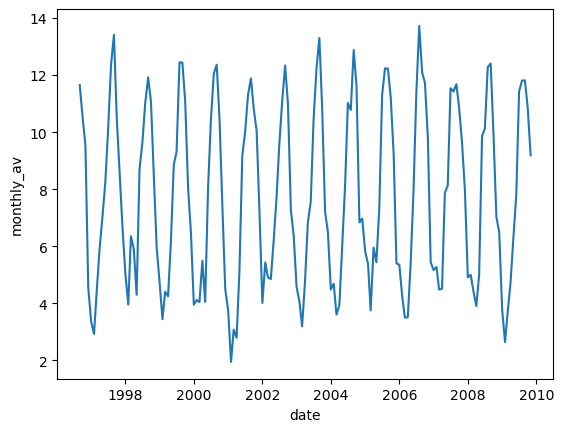

In [54]:
# Plot
sns.lineplot(data=df, x='date', y='monthly_av')

#### The Windspeed

In [97]:
# Show data
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, low_memory=False)
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


Checking 'wdsp' column type.

In [100]:
# type of column.
print(df['wdsp'].dtype)

object


In [107]:
# Convert windspeed to floats
#df['wdsp'] = df['wdsp'].astype(float) 

Calculate average windspeed

In [105]:
# Yearly average
#y_ave =  df['wdsp'].resample('YE').mean()


In [110]:
# Yearly average
#y_ave =  df['wdsp'].resample('YE').mean()

# Create 'y_ave' column
#df['y_ave'] = df['wdsp'].resample('YE').mean()


In [111]:
#missing data

# print(df['y_ave'].isnull())

In [58]:
# Dropping null values.

df.dropna(inplace = True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,wddir,ww,w,sun,vis,clht,clamt,daily_av,monthly_av,y_ave
date,,,,,,,,,,,,,,,,,,,,,
1996-12-31,0,0.0,1,-0.2,1,-1.4,-4.0,4.6,76,1024.3,...,50,2,11,4.9,40000,50,5,-1.504167,3.353333,13.200000
1997-12-31,0,0.2,0,4.1,0,3.5,2.6,7.4,90,986.0,...,290,21,62,0.0,25000,28,8,1.320833,5.032258,8.083333
1998-12-31,0,0.0,0,4.0,0,3.1,1.7,6.9,85,986.2,...,130,2,11,0.0,30000,35,6,3.945833,4.729032,9.500000


<Axes: xlabel='date', ylabel='y_ave'>

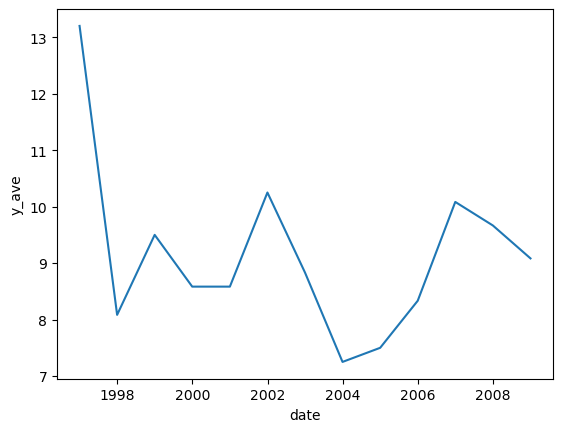

In [59]:
# Plot
sns.lineplot(data=df, x='date', y='y_ave')

Daily Maximum windspeed.

In [60]:
# Maximum daily windspeed
daily_maxspeed =  df['wdsp'].resample('D').max()

# Create 'daily_max' column
df['daily_maxspeed'] = df["wdsp"].resample("D").max()


<Axes: xlabel='date', ylabel='daily_maxspeed'>

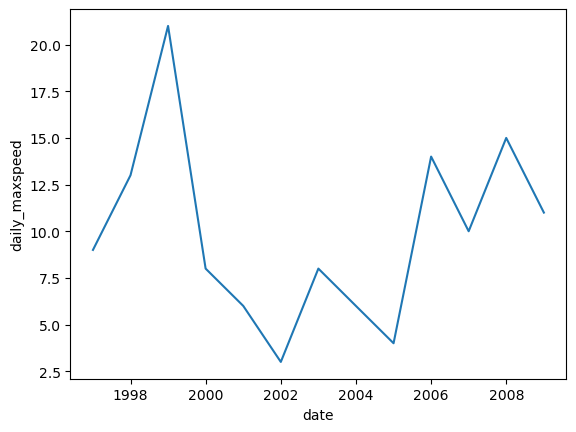

In [61]:
# Plot
sns.lineplot(data=df, x='date', y='daily_maxspeed')

Monthly Mean for daily maximum windspeed.

In [62]:
# Monthly mean of daily maximun speed
monthly_av_maxspeed = df['daily_maxspeed'].resample('ME').mean()

#Create 'monthly_maxspeed' column
df['monthly_av_maxspeed'] = df["daily_maxspeed"].resample("ME").mean()


<Axes: xlabel='date', ylabel='monthly_av_maxspeed'>

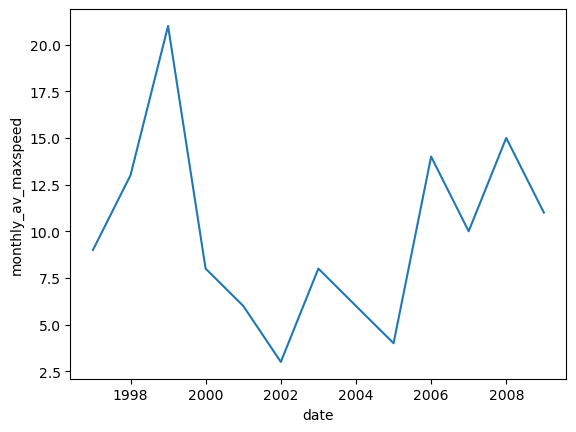

In [63]:
#Plot
sns.lineplot(data=df, x='date', y='monthly_av_maxspeed')